In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [8]:
tweets = pd.read_csv('./bigtweetsunionaccounts.csv')

In [9]:
tweets.head()

,tweetid,datetime,twitterhandle,tweetcontent,accountname,region,portfolio,subportfolio
0,1.349380e+18,2021-01-13 15:18:08+00:00,LloydsBank,"@Andyram2k Hi Andy, thanks for bringing this t...",LLOYDS BANKING GROUP,UKIIMEA,BCM,BCM
1,1.354970e+18,2021-01-29 02:06:23+00:00,LloydsBank,"@MissHC6 Hi, I'm Dave. Thanks for getting in t...",LLOYDS BANKING GROUP,UKIIMEA,BCM,BCM
2,1.349380e+18,2021-01-13 15:35:14+00:00,LloydsBank,@TheRobbo1 Thanks for the additional info Mark...,LLOYDS BANKING GROUP,UKIIMEA,BCM,BCM
3,1.349380e+18,2021-01-13 15:43:18+00:00,LloydsBank,"@fuji_fod Hi, I'm Delina. I'd like to help. Pa...",LLOYDS BANKING GROUP,UKIIMEA,BCM,BCM
4,1.356670e+18,2021-02-02 18:39:37+00:00,LloydsBank,@bellaar_ Hi Bella. Thanks for getting in touc...,LLOYDS BANKING GROUP,UKIIMEA,BCM,BCM


In [10]:
features = tweets.tweetcontent
target = tweets.subportfolio

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

In [12]:
# instantiate a CountVectorizer object
vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [13]:
# can get the token names from the vectorizer once it's fit
print(vect.get_feature_names()[:20])
print(vect.get_feature_names()[-20:])

['00', '000', '0000', '00000000', '000003', '000006', '000019', '000028', '000068', '0000laura', '0000our', '0000regardsgavin', '0000with', '000110', '000178', '000179', '000187', '000225', '000235', '000credit']
['𝗗𝗮𝘆', '𝗙𝘂𝗹𝗹', '𝗜𝗻𝗱𝘂𝘀𝘁𝗿𝘆', '𝗜𝗻𝘁𝗲𝗿𝘃𝗶𝗲𝘄in', '𝗡𝗼𝘄', '𝗦𝗺𝗶𝗹𝗲', '𝗦𝘆𝗿𝗶𝗮', '𝗪𝗼𝗿𝗹𝗱', '𝗳𝗿𝗼𝗺', '𝗵𝗲𝗹𝗽', '𝗶𝗻𝘁𝗲𝗴𝗿𝗮𝘁𝗲', '𝗿𝗲𝗳𝘂𝗴𝗲𝗲𝘀', '𝘁𝗵𝗲', '𝘒𝘯𝘶𝘵𝘴𝘤𝘩𝘬𝘶𝘨𝘦𝘭', '𝘥𝘦𝘧𝘪𝘯𝘪𝘵𝘪𝘰𝘯', '𝘾𝙝𝙖𝙩', '𝙇𝙞𝙫𝙚', '𝙡𝙤𝙩𝙨', '𝟬𝟬𝟬', '𝟮𝟬']


In [14]:
X_train_dtm.shape

(47312, 88250)

In [15]:
lr = LogisticRegression(max_iter=500)

lr.fit(X_train_dtm, y_train)
y_pred = lr.predict(X_test_dtm)
print(X_test[:3], '\n', y_pred[:3])

lr.score(X_test_dtm, y_test)

45061    Increases in global development and internatio...
10276    @IrBchn Hi, I'm Laura. We know some of our cus...
6433     @Tifflovesdisney That's correct. You won't nee...
Name: tweetcontent, dtype: object 
 ['Telecommunications' 'BCM' 'BCM']


0.9469596189331846

In [16]:
# check baseline accuracy
tweets.subportfolio.value_counts(normalize=True)

BCM                        0.365461
Energy Utility & Tech.     0.246038
Public Sector & Defence    0.144658
Manuf & Automotive         0.091241
Transportation             0.069164
Telecommunications         0.043574
Retail                     0.017617
Chemicals & Agriculture    0.016229
Insurance                  0.006019
Name: subportfolio, dtype: float64

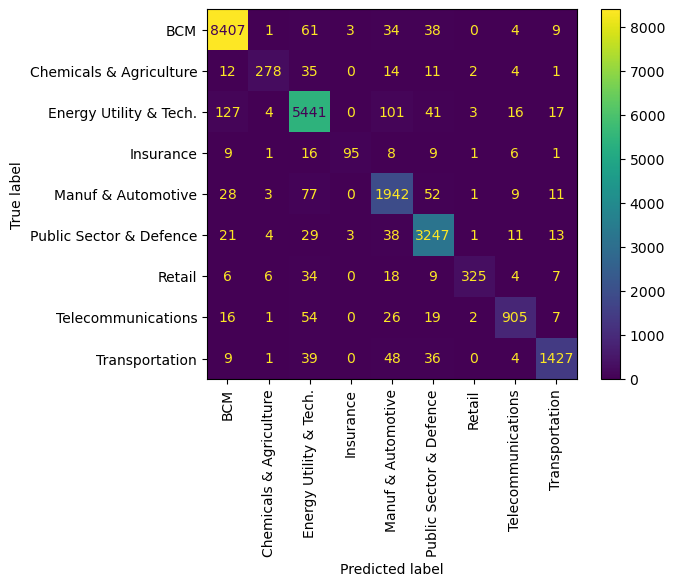

In [17]:
import matplotlib.pyplot as plt
plt.style.use('default')
plot_confusion_matrix(lr, X_test_dtm, y_test, xticks_rotation='vertical');

## Latent Dirichlet Allocation

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
tweets = pd.read_csv('./bigtweetsunionaccounts.csv')

In [20]:
corpus = tweets.tweetcontent.values

In [21]:
vect = CountVectorizer(max_df=0.90, min_df=3, ngram_range=(1, 2), max_features=2000, stop_words='english')

In [22]:
dtm = vect.fit_transform(corpus)

In [33]:
lda = LatentDirichletAllocation(n_components=30)
lda.fit(dtm)

LatentDirichletAllocation(n_components=30)

In [29]:
# this is a list of how closely each word aligns with each topic
lda.components_

array([[1.00002867e-01, 1.00004376e-01, 1.00006002e-01, ...,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01],
       [1.00003171e-01, 1.00003758e-01, 1.00005655e-01, ...,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01],
       [1.00006035e-01, 1.00002854e-01, 1.00002839e-01, ...,
        5.53099997e+02, 3.55099995e+02, 2.71099995e+02],
       ...,
       [2.43287793e+02, 3.31963847e+02, 5.69099974e+02, ...,
        1.00000037e-01, 1.00000022e-01, 1.00000019e-01],
       [2.02833126e+02, 3.40547632e+02, 1.00000124e-01, ...,
        1.00002717e-01, 1.00003899e-01, 1.00004405e-01],
       [1.00001467e-01, 1.33182406e+02, 1.00000046e-01, ...,
        1.00000059e-01, 1.00000024e-01, 1.00000000e-01]])

In [34]:
# this will let us view the most important words for each topic, as determined by LDA

def display_topics(model, feature_names, no_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index}")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15

In [35]:
display_topics(lda, vect.get_feature_names(), no_top_words)

Topic 0
dm, account, hi, look, number, address, sorry, account number, date, dob, query, send, details, birth, ll
Topic 1
contact, hi, details, team, https, dm, local, contact details, page, lg0eck7edw, https lg0eck7edw, local team, information, thank, thanks
Topic 2
https, new, microfocus, cyberresilience, learn, cyberresilience https, blog, data, security, learn https, sap, cloud, blog https, latest, cybersecurity
Topic 3
able, colleagues, 0345, team, 300, 0345 300, look, help, thanks, contact, 0000, don, touch, 300 0000, andym
Topic 4
thank, sharing, welcome, good, thank sharing, hello, send, care, amazing, send dm, looks, gather, ja, gt, dm gather
Topic 5
https, year, today, defence, uk, 2021, forces, في, week, armed, armed forces, years, amp, على, day
Topic 6
direct, sorry, bank, money, payments, debit, issue, direct debit, earlier, want, delay, took, account, refunded, station
Topic 7
https, support, help, health, work, amp, women, need, care, people, apply, access, watch, reachi

#### Larger Dataset

In [65]:
bigtweets = pd.read_csv('./bigtweets.csv')

In [67]:
bigtweets.head()

,TweetId,Datetime,TwitterHandle,Tweetcontent
0,1.465100e+18,2021-11-28 23:26:06+00:00,VW,"@GiggsyTheCorgi Hi there, we hope you were abl..."
1,1.465100e+18,2021-11-28 23:27:10+00:00,VW,"@breebousley13 Hi Aubrey, we can understand ho..."
2,1.465150e+18,2021-11-29 03:02:53+00:00,Airbus,Congratulations 🎉 @CebuPacificAir on the deliv...
3,1.465190e+18,2021-11-29 05:22:06+00:00,SAP,Experience:💸 @SAPAriba for direct and indirect...
4,1.465210e+18,2021-11-29 06:33:08+00:00,Philips,@SOOOOOMA______ Good morningThank you for your...


In [68]:
corpus = bigtweets.Tweetcontent.values

In [69]:
vect = CountVectorizer(max_df=0.90, min_df=3, ngram_range=(1, 2), max_features=2000, stop_words='english')

In [70]:
dtm = vect.fit_transform(corpus)

In [75]:
lda = LatentDirichletAllocation(n_components=10)
lda.fit(dtm)

LatentDirichletAllocation()

In [76]:
# this is a list of how closely each word aligns with each topic
lda.components_

array([[ 0.1       ,  0.1000011 ,  0.10000019, ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.10000307,  0.10000045,  0.10000013, ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.10000425,  0.10000308,  0.10002739, ...,  0.1       ,
         0.1       ,  0.1       ],
       ...,
       [ 0.10005434, 26.90596179,  0.10001279, ..., 10.09999899,
        13.09969445, 11.1       ],
       [ 0.10000993,  0.10002441,  0.10001259, ...,  0.10000048,
         0.1       ,  0.1       ],
       [21.09989266,  0.10000553, 39.63972074, ...,  0.1       ,
         0.1       ,  0.1       ]])

In [77]:
# this will let us view the most important words for each topic, as determined by LDA

def display_topics(model, feature_names, no_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index}")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15

In [78]:
display_topics(lda, vect.get_feature_names(), no_top_words)

Topic 0
reaching, thank, sharing, vw, bmw, thanks, social, recommend, help, hello, order, information, thanks sharing, need, happy
Topic 1
https, covid, hi, 19, try, covid 19, know, let, uk, let know, given, booster, delay, vaccine, nicola
Topic 2
hi, sorry, dm, address, number, details, account, team, help, look, eonhelp, hear, ll, https, able
Topic 3
hi, thank, message, contact, hello, send, https, soon, team, hear, sorry, help, thanks, link, customer
Topic 4
https, new, year, amp, christmas, covid19, support, people, day, booster, learn, help, uk, today, microfocus
Topic 5
https, free, care, feel, information, feel free, imaginepossible, new, future, change, read, help, 5g, know, 2021
Topic 6
hi, sorry, dm, hear, card, sorry hear, thanks, ve, account, details, ll, having, branch, send, able
Topic 7
https, sie, die, wir, der, und, team, في, 0345, replied, banking, المالية, den, على, من
Topic 8
https, amp, service, services, 2022, ve, help, thanks, website, able, mofuae, digital, repo

### Compare innovation and non innovation tweets

take a string and return True if contains innovation, false otherwise. use that function to make a new column in pandas using .apply

In [121]:
bigtweets = pd.read_csv('./bigtweets.csv')

In [109]:
bigtweets.head()

,TweetId,Datetime,TwitterHandle,Tweetcontent,Innovation
0,1.465100e+18,2021-11-28 23:26:06+00:00,VW,"@GiggsyTheCorgi Hi there, we hope you were abl...",False
1,1.465100e+18,2021-11-28 23:27:10+00:00,VW,"@breebousley13 Hi Aubrey, we can understand ho...",False
2,1.465150e+18,2021-11-29 03:02:53+00:00,Airbus,Congratulations 🎉 @CebuPacificAir on the deliv...,False
3,1.465190e+18,2021-11-29 05:22:06+00:00,SAP,Experience:💸 @SAPAriba for direct and indirect...,False
4,1.465210e+18,2021-11-29 06:33:08+00:00,Philips,@SOOOOOMA______ Good morningThank you for your...,False


In [117]:
import re

In [127]:
bigtweets["Innovation"] = bigtweets["Tweetcontent"].str.contains("innovation|innovator|innovative", flags=re.IGNORECASE, regex=True)

In [128]:
mask = (bigtweets.Innovation == True)

In [129]:
masktweets = bigtweets[mask]

In [130]:
masktweets.size

135

In [131]:
corpus = masktweets.Tweetcontent.values

In [132]:
vect = CountVectorizer(max_df=0.90, min_df=3, ngram_range=(1, 2), max_features=2000, stop_words='english')

In [133]:
dtm = vect.fit_transform(corpus)

In [134]:
lda = LatentDirichletAllocation(n_components=5)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5)

In [135]:
# this is a list of how closely each word aligns with each topic
lda.components_

array([[ 4.19993501,  0.20137392,  0.20000787,  3.19872606,  2.20111267,
         2.20278479,  4.36045633,  7.19778816,  5.20375251,  0.20000639,
         0.20001556,  0.20248477,  0.2023974 ,  0.20002495,  2.20347434,
         0.20000637,  0.20000637,  0.20000767,  0.20000836,  0.20001372,
         3.1992132 ,  0.20001854],
       [ 0.20000351,  0.20001086,  3.1977095 ,  1.19194782,  0.20000751,
         0.20000943, 16.07124644,  0.20000817,  8.19605316,  3.19990918,
         0.20245723,  0.20001354,  0.20000971,  1.19638558,  2.20060429,
         3.19990906,  3.19990906,  4.19810761,  3.19739937,  0.20000993,
         0.20000563,  1.19865101],
       [ 0.20000399,  3.19842592,  0.2000066 ,  0.20160496,  2.19874912,
         1.19704277, 14.03104798,  0.20206047,  0.20001268,  0.20000529,
         1.18364758,  9.19725701,  3.19741568,  2.20328394,  1.19564137,
         0.20000526,  0.20000526,  0.20000638,  0.20000701,  2.19371758,
         0.2006797 ,  2.2011048 ],
       [ 0.20001636

In [136]:
# this will let us view the most important words for each topic, as determined by LDA

def display_topics(model, feature_names, no_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index}")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15

In [137]:
display_topics(lda, vect.get_feature_names(), no_top_words)

Topic 0
imaginepossible, innovation, https, 5g, space, explore, new, hear, future, innovative, learn, amp, like, working, innovations
Topic 1
https, innovation, read, innovation https, plantbased innovation, plantbased, based, read https, new, working, like, explore, innovations, innovative, amp
Topic 2
https, innovative, amp, learn, like, working, future, solutions, hear, new, innovations, imaginepossible, explore, space, innovation
Topic 3
innovations, https, explore, solutions, based, read https, read, new, like, innovative, working, learn, amp, innovation, hear
Topic 4
https, like, new, innovative, explore, working, amp, innovations, innovation, solutions, learn, hear, imaginepossible, future, space
